In [315]:
import numpy as np, pandas as pd
import scipy.stats as stat
import sklearn as sk
import pandas_profiling
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score

In [317]:
%pwd

'C:\\Users\\RAHUL\\PYTHON Assignment\\Data Science\\4. Segmentation of Credit Card Customers'

In [318]:
credit_card = pd.read_csv('CC_GENERAL.csv')

In [319]:
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [320]:
pandas_profiling.ProfileReport(credit_card)

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [321]:
credit_card.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

### Derived Variables

In [322]:
credit_card.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [323]:
credit_card['Monthly_Avg_Purchase'] = credit_card.PURCHASES / credit_card.TENURE
credit_card['Monthly_Cash_Advance'] = credit_card.CASH_ADVANCE / credit_card.TENURE
credit_card['Limit_Usage'] = credit_card.BALANCE / credit_card.CREDIT_LIMIT

In [324]:
def purchase_type(x):
    if (x.ONEOFF_PURCHASES == 0) & (x.INSTALLMENTS_PURCHASES == 0):
        return 'None'
    elif (x.ONEOFF_PURCHASES > 0) & (x.INSTALLMENTS_PURCHASES == 0):
        return 'One-Of'
    elif (x.ONEOFF_PURCHASES == 0) & (x.INSTALLMENTS_PURCHASES > 0):
        return 'Installment_Purchases'
    elif (x.ONEOFF_PURCHASES > 0) & (x.INSTALLMENTS_PURCHASES > 0):
        return 'Both'

In [325]:
credit_card['Purchase_Type'] = credit_card.apply(purchase_type,axis=1)

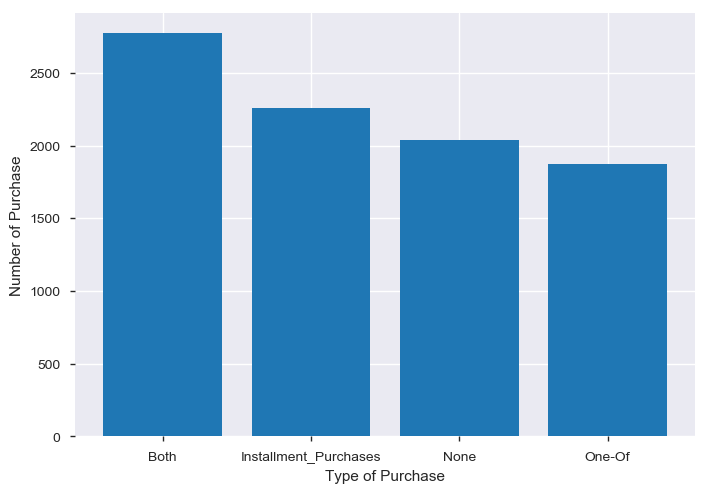

In [326]:
a = credit_card.Purchase_Type.value_counts()

plt.xlabel('Type of Purchase')
plt.ylabel('Number of Purchase')
plt.bar(a.index,a.values)
plt.show()

In [327]:
credit_card['Purchase_Type'] = credit_card['Purchase_Type'].map({'Both':3,
                                                                 'Installment_Purchases':2,
                                                                 'None':0,
                                                                 'One-Of':1})

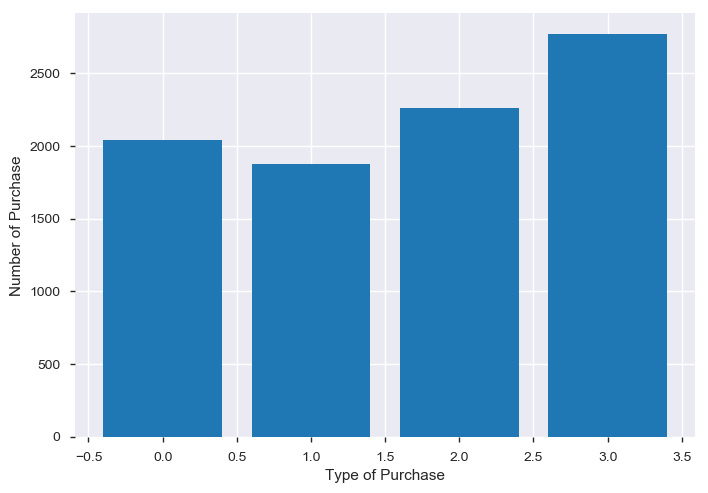

In [328]:
a = credit_card.Purchase_Type.value_counts()

plt.xlabel('Type of Purchase')
plt.ylabel('Number of Purchase')
plt.bar(a.index,a.values)
plt.show()

In [329]:
credit_card.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Limit_Usage',
       'Purchase_Type'],
      dtype='object')

In [330]:
credit_card.describe(percentiles=[.01,.05,0.1,.25,.5,.75,.9,.95,.99])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Purchase_Type
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,86.175173,88.977984,0.388926,1.644246
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331,180.508787,193.136115,0.389722,1.142602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
1%,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,500.000000,0.000000,19.524478,0.000000,6.000000,0.000000,0.000000,0.000028,0.000000
5%,8.814518,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1000.000000,89.988924,73.282006,0.000000,8.000000,0.000000,0.000000,0.002943,0.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1200.000000,179.617069,106.034864,0.000000,10.000000,0.000000,0.000000,0.007793,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000,3.399375,0.000000,0.041527,1.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302870,2.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000,97.228333,99.085196,0.717582,3.000000


### Dropping the Variables having high Correlation

In [331]:
credit_card.drop(columns=['CUST_ID'],inplace=True)

#### Missing Value Treatment

In [332]:
credit_card.isna().any().sum()

3

In [333]:
def Missing(x):
    x = x.fillna(x.mean())
    return x

In [334]:
credit_card = credit_card.apply(lambda x: Missing(x))
credit_card.isna().any().sum()

0

#### Outlier Treatment

In [335]:
def Outlier(x):
    x = x.clip(lower = x.dropna().quantile(0.05),upper = x.dropna().quantile(0.95))
    return x

In [336]:
credit_card = credit_card.apply(lambda x: Outlier(x))

#### Final FIle for Analysis

In [337]:
credit_card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Purchase_Type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,2
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,89.988924,864.206542,0.000000,12,124.916667,17.149001,0.222223,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,1


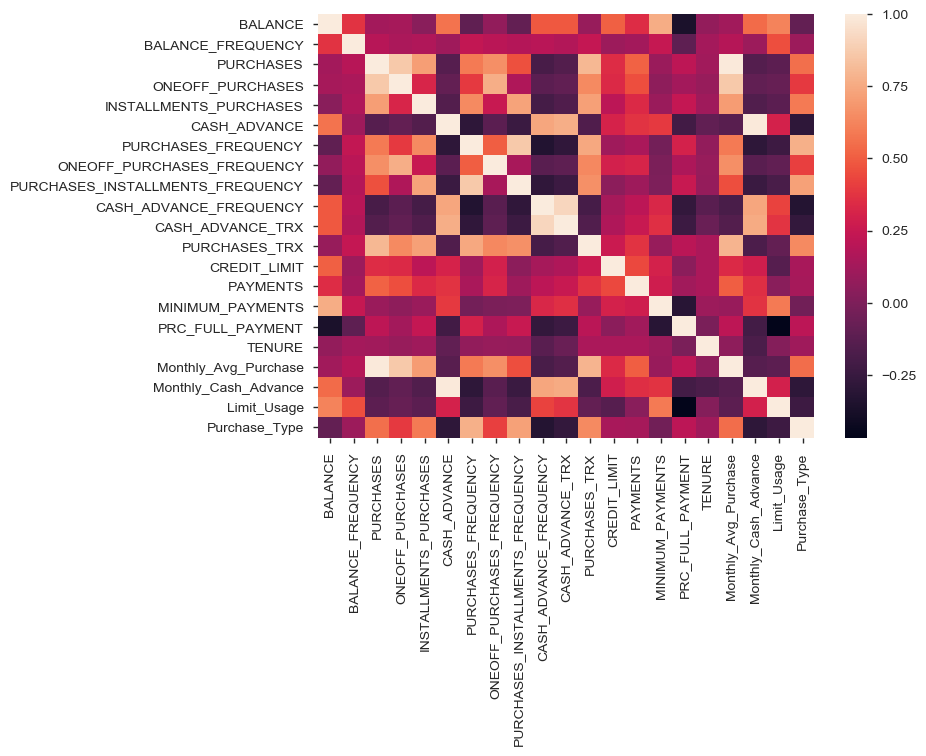

In [338]:
sns.heatmap(credit_card.corr())

In [339]:
credit_card.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Limit_Usage',
       'Purchase_Type'],
      dtype='object')

## Standardizing Data

In [340]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
credit_scaled = sc.fit_transform(credit_card)

In [341]:
credit_scaled = pd.DataFrame(credit_scaled)

In [342]:
credit_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,...,-0.680426,-1.049831,-0.800356,-0.718147,-0.525551,0.378995,-0.672440,-0.600126,-0.990038,0.311372
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,...,-0.807798,0.821154,1.643245,0.597061,0.234227,0.378995,-0.757187,2.868023,0.212119,-1.439116
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,...,-0.043563,0.977070,-0.537116,-0.030428,-0.525551,0.378995,-0.070357,-0.600126,-0.148039,-0.563872
3,0.126875,-1.130304,0.613899,1.408742,-0.675642,-0.453170,-1.014125,-0.399319,-0.916995,-0.250789,...,-0.744112,0.977070,-0.870392,0.303611,-0.525551,0.378995,0.574420,-0.460364,-0.466802,-0.563872
4,-0.375812,0.534496,-0.734587,-0.578948,-0.675642,-0.605707,-1.014125,-0.399319,-0.916995,-0.722502,...,-0.744112,-0.987465,-0.501872,-0.569709,-0.525551,0.378995,-0.742974,-0.600126,0.858317,-0.563872


## Importing Required Libraries for Segmentation Analysis

In [343]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [344]:
from sklearn.decomposition import PCA

In [345]:
len(credit_scaled.columns)

21

In [346]:
## Taking all features while building the initial FA
pca = PCA(n_components=21)

In [347]:
pca.fit(credit_scaled)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [348]:
np.round(pca.explained_variance_,2)

array([6.79, 4.9 , 1.8 , 1.56, 1.15, 0.9 , 0.75, 0.71, 0.53, 0.44, 0.33,
       0.3 , 0.23, 0.21, 0.14, 0.11, 0.08, 0.05, 0.03, 0.01, 0.  ])

In [349]:
#Eigen values
sum(pca.explained_variance_)

21.00234663090849

In [350]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
np.round(var,2)

array([0.32, 0.23, 0.09, 0.07, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ])

In [351]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [352]:
var1

array([ 32.33,  55.67,  64.25,  71.66,  77.13,  81.42,  84.98,  88.36,
        90.88,  92.98,  94.54,  95.95,  97.06,  98.04,  98.73,  99.24,
        99.6 ,  99.82,  99.95,  99.98, 100.  ])

##### Number of components have choosen as 6 based on cumulative variacne is explaining >80 %  and the first 6 component has component variance of <1 and > 0.8

In [353]:
pc_final = PCA(n_components=6).fit(credit_scaled)

In [354]:
pc_final.explained_variance_

array([6.78954189, 4.90092683, 1.80209457, 1.55617157, 1.14870707,
       0.90201463])

In [355]:
reduced_cr=pc_final.fit_transform(credit_scaled) 

In [356]:
dimensions = pd.DataFrame(reduced_cr,columns = ["C1", "C2", "C3", "C4", "C5","C6"])

In [357]:
dimensions.head(2)

,C1,C2,C3,C4,C5,C6
0,-1.125589,-2.543384,-0.094366,0.331979,-0.219901,-0.169237
1,-3.238879,2.956462,1.637714,-0.602523,-1.384126,-0.245534


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [358]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=credit_card.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_card.columns).T

In [359]:
Loadings.to_csv('Loadings.csv')

In [360]:
Loadings

,0,1,2,3,4,5
BALANCE,-0.138002,0.834728,-0.247510,0.154789,-0.181303,0.194795
BALANCE_FREQUENCY,0.149481,0.418166,-0.497230,0.081001,0.213036,-0.461838
PURCHASES,0.868112,0.338968,0.136789,0.163989,0.090302,0.065259
ONEOFF_PURCHASES,0.696611,0.336106,0.288722,0.437085,0.215885,0.000084
INSTALLMENTS_PURCHASES,0.750820,0.183760,-0.166204,-0.334939,-0.116168,0.114425
CASH_ADVANCE,-0.428287,0.754092,0.245641,-0.295532,-0.017410,-0.029482
PURCHASES_FREQUENCY,0.831237,0.010192,-0.220732,-0.326082,0.080409,-0.052467
ONEOFF_PURCHASES_FREQUENCY,0.649523,0.250044,0.223425,0.377136,0.267706,-0.159316
PURCHASES_INSTALLMENTS_FREQUENCY,0.709449,-0.015858,-0.351435,-0.547546,-0.063900,0.032374
CASH_ADVANCE_FREQUENCY,-0.483762,0.682978,0.105751,-0.227857,0.225021,-0.199059


### Clustering

In [361]:
credit_card.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Purchase_Type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,2
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.0,0.000000,0.25,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,1


In [362]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['Monthly_Avg_Purchase',
'Purchase_Type',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'ONEOFF_PURCHASES_FREQUENCY',
'BALANCE',
'Monthly_Cash_Advance',
'CASH_ADVANCE_FREQUENCY',
'MINIMUM_PAYMENTS',
'Limit_Usage'
]

In [363]:
credit_card.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Limit_Usage',
       'Purchase_Type'],
      dtype='object')

In [364]:
credit_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,...,-0.680426,-1.049831,-0.800356,-0.718147,-0.525551,0.378995,-0.672440,-0.600126,-0.990038,0.311372
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,...,-0.807798,0.821154,1.643245,0.597061,0.234227,0.378995,-0.757187,2.868023,0.212119,-1.439116


In [365]:
credit_scaled1=pd.DataFrame(credit_scaled) 
credit_scaled1.columns=credit_card.columns
credit_scaled1.head(5)

credit_scaled2=credit_scaled[list_var]
credit_scaled2.head()

,Monthly_Avg_Purchase,Purchase_Type,PURCHASES_INSTALLMENTS_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,BALANCE,Monthly_Cash_Advance,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,Limit_Usage
0,-0.672440,0.311372,-0.707313,-0.678661,-0.835783,-0.600126,-0.722502,-0.718147,-0.990038
1,-0.757187,-1.439116,-0.916995,-0.678661,1.036257,2.868023,0.692644,0.597061,0.212119
2,-0.070357,-0.563872,-0.916995,2.673451,0.617437,-0.600126,-0.722502,-0.030428,-0.148039
3,0.574420,-0.563872,-0.916995,-0.399319,0.126875,-0.460364,-0.250789,0.303611,-0.466802
4,-0.742974,-0.563872,-0.916995,-0.399319,-0.375812,-0.600126,-0.722502,-0.569709,0.858317


## Segmentation

In [376]:
km_3=KMeans(n_clusters=3,random_state=123)

In [377]:
km_3.fit(credit_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [378]:
km_3.labels_

array([0, 1, 2, ..., 0, 0, 2])

In [379]:
km_3.cluster_centers_

array([[-0.29336329,  0.12932263,  0.10880739, -0.30422432, -0.61835304,
        -0.48464003, -0.5351506 , -0.50344872, -0.58762945],
       [-0.51056454, -0.74329003, -0.59395395, -0.40221765,  0.73218369,
         0.8495198 ,  0.92963834,  0.60879561,  0.86647853],
       [ 1.61372873,  0.98142474,  0.77080373,  1.45102736,  0.24022568,
        -0.29361153, -0.30949202,  0.17344007, -0.07006745]])

In [380]:
km_4=KMeans(n_clusters=4,random_state=123).fit(credit_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(credit_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(credit_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(credit_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(credit_scaled2)
#km_5.labels_

In [381]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
credit_card['cluster_3'] = km_3.labels_
credit_card['cluster_4'] = km_4.labels_
credit_card['cluster_5'] = km_5.labels_
credit_card['cluster_6'] = km_6.labels_
credit_card['cluster_7'] = km_7.labels_
credit_card['cluster_8'] = km_8.labels_

In [382]:
credit_card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Purchase_Type,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,2,0,0,1,4,4,1
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.000000,425.548562,0.457495,0,1,2,2,3,2,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,1,2,3,4,4,4,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,1,0,1,0,4,4,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,1,0,1,0,4,4,7


In [383]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.472179
1    0.335642
2    0.192179
dtype: float64

In [384]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.395642
1    0.277318
3    0.175196
2    0.151844
dtype: float64

In [385]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.346145
0    0.255642
4    0.148268
3    0.129274
2    0.120670
dtype: float64

In [386]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

0    0.265028
1    0.207263
4    0.169274
2    0.128827
5    0.120559
3    0.109050
dtype: float64

In [387]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

1    0.242011
0    0.189721
4    0.169162
3    0.122570
5    0.121229
2    0.104246
6    0.051061
dtype: float64

 - Looking at the variance of the components, KMeans for 5 or 6 components looks to be the good since the lowest variance is more than 5 % and greatest variance is less than 40 % . We will check which one of them is better through SCcoeffecient <br>

### Choosing number clusters using Silhouette Coefficient

In [388]:
# calculate SC for K=3
from sklearn import metrics
print(metrics.silhouette_score(credit_scaled2, km_6.labels_))
print(metrics.silhouette_score(credit_scaled2, km_5.labels_))

0.23882360109302853
0.2661285139131651


In [389]:
# calculate SC for K=3 through K=12
k_range = range(3, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(credit_scaled2)
    scores.append(metrics.silhouette_score(credit_scaled2, km.labels_))

In [390]:
scores

[0.26372511737255844,
 0.25388073809659584,
 0.2661285139131651,
 0.23882360109302853,
 0.2486780728573405,
 0.25877004858582664,
 0.2571062841900299]

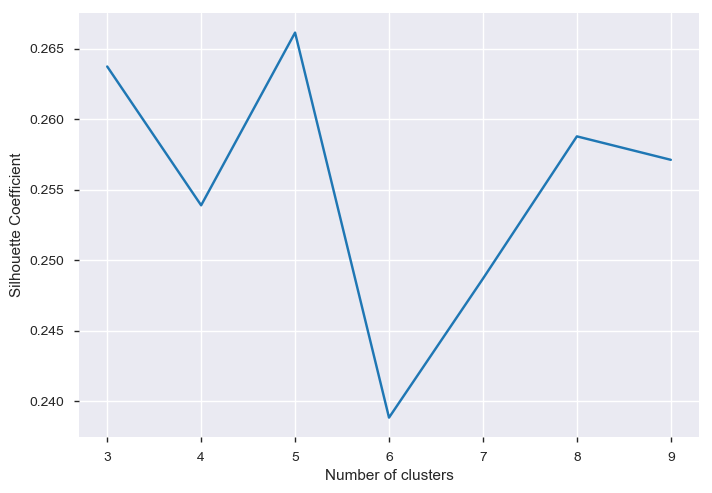

In [391]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution is best

### Segment Distribution

In [392]:
credit_card.cluster_5.value_counts()/sum(credit_card.cluster_5.value_counts())

1    0.346145
0    0.255642
4    0.148268
3    0.129274
2    0.120670
Name: cluster_5, dtype: float64

## Profiling

In [393]:
size=pd.concat([pd.Series(credit_card.cluster_3.size), pd.Series.sort_index(credit_card.cluster_3.value_counts()), pd.Series.sort_index(credit_card.cluster_4.value_counts()),
           pd.Series.sort_index(credit_card.cluster_5.value_counts()), pd.Series.sort_index(credit_card.cluster_6.value_counts())])

In [394]:
size

0    8950
0    4226
1    3004
2    1720
0    3541
1    2482
2    1359
3    1568
0    2288
1    3098
2    1080
3    1157
4    1327
0    2372
1    1855
2    1153
3     976
4    1515
5    1079
dtype: int64

In [395]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_card.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950,4226,3004,1720,3541,2482,1359,1568,2288,3098,1080,1157,1327,2372,1855,1153,976,1515,1079


In [396]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_Pct,1.0,0.472179,0.335642,0.192179,0.395642,0.277318,0.151844,0.175196,0.255642,0.346145,0.12067,0.129274,0.148268,0.265028,0.207263,0.128827,0.10905,0.169274,0.120559


In [397]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950.0,4226.000000,3004.000000,1720.000000,3541.000000,2482.000000,1359.000000,1568.000000,2288.000000,3098.000000,1080.00000,1157.000000,1327.000000,2372.000000,1855.000000,1153.000000,976.00000,1515.000000,1079.000000
Seg_Pct,1.0,0.472179,0.335642,0.192179,0.395642,0.277318,0.151844,0.175196,0.255642,0.346145,0.12067,0.129274,0.148268,0.265028,0.207263,0.128827,0.10905,0.169274,0.120559


In [398]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_card.apply(lambda x: x.mean()).T, credit_card.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_card.groupby('cluster_4').apply(lambda x: x.mean()).T,credit_card.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_card.groupby('cluster_6').apply(lambda x: x.mean()).T], axis=1)


In [399]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
BALANCE,1452.399593,408.187256,2689.652862,1857.127799,403.105118,1351.424832,4283.954557,1527.710751,1290.111984,265.360621,4177.060192,2823.186802,1090.776787,317.090014,1615.316842,1265.435732,4337.235627,343.557799,2815.335186
BALANCE_FREQUENCY,0.883252,0.792782,0.956780,0.977118,0.798584,0.893554,0.981257,0.973209,0.889726,0.772638,0.968465,0.991119,0.966928,0.840542,0.946303,0.971779,0.967319,0.674331,0.991448
PURCHASES,823.863022,498.765260,260.991045,2605.683115,578.747845,122.362844,737.535235,2562.635818,117.044362,565.440403,440.320055,1310.179468,2534.000657,641.790552,100.982620,2801.337748,501.881534,389.330040,1255.153184
ONEOFF_PURCHASES,447.948730,208.959349,151.758194,1552.440294,205.546625,110.396678,365.586433,1601.061236,109.165788,201.757853,274.581807,578.077967,1634.468289,144.215999,89.413835,1775.121320,308.058129,371.563296,547.636801
INSTALLMENTS_PURCHASES,336.336040,283.689743,105.154604,869.447834,364.998104,11.933480,327.111641,793.103098,7.697350,355.966754,152.351472,642.345449,740.073659,485.266009,11.368647,844.153239,173.431519,16.038231,622.050028
CASH_ADVANCE,817.161146,159.265085,1963.611309,431.307926,92.286010,1149.395140,2752.645249,250.742259,966.464847,74.148618,3590.330231,611.395874,216.779645,98.251116,1126.001268,254.588937,3757.968511,271.066610,574.443030
PURCHASES_FREQUENCY,0.490351,0.519911,0.207051,0.912508,0.610038,0.086549,0.428723,0.912655,0.077458,0.594114,0.260860,0.760873,0.910918,0.740476,0.080705,0.918801,0.283430,0.223605,0.748615
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.111564,0.082496,0.635297,0.098527,0.065292,0.154486,0.695863,0.063423,0.092937,0.128519,0.230490,0.733601,0.073469,0.059071,0.732198,0.138951,0.202851,0.223346
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.407582,0.128428,0.670627,0.514245,0.019741,0.321148,0.609269,0.012491,0.499824,0.159657,0.652094,0.571044,0.674104,0.019606,0.642637,0.177353,0.016964,0.636341
CASH_ADVANCE_FREQUENCY,0.127637,0.033157,0.291881,0.072920,0.021768,0.212470,0.336122,0.051743,0.195524,0.016661,0.423050,0.112212,0.042696,0.021759,0.232497,0.048420,0.426759,0.047572,0.106620


In [400]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [401]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950.000000,4226.000000,3004.000000,1720.000000,3541.000000,2482.000000,1359.000000,1568.000000,2288.000000,3098.000000,1080.000000,1157.000000,1327.000000,2372.000000,1855.000000,1153.000000,976.000000,1515.000000,1079.000000
Seg_Pct,1.000000,0.472179,0.335642,0.192179,0.395642,0.277318,0.151844,0.175196,0.255642,0.346145,0.120670,0.129274,0.148268,0.265028,0.207263,0.128827,0.109050,0.169274,0.120559
BALANCE,1452.399593,408.187256,2689.652862,1857.127799,403.105118,1351.424832,4283.954557,1527.710751,1290.111984,265.360621,4177.060192,2823.186802,1090.776787,317.090014,1615.316842,1265.435732,4337.235627,343.557799,2815.335186
BALANCE_FREQUENCY,0.883252,0.792782,0.956780,0.977118,0.798584,0.893554,0.981257,0.973209,0.889726,0.772638,0.968465,0.991119,0.966928,0.840542,0.946303,0.971779,0.967319,0.674331,0.991448
PURCHASES,823.863022,498.765260,260.991045,2605.683115,578.747845,122.362844,737.535235,2562.635818,117.044362,565.440403,440.320055,1310.179468,2534.000657,641.790552,100.982620,2801.337748,501.881534,389.330040,1255.153184
ONEOFF_PURCHASES,447.948730,208.959349,151.758194,1552.440294,205.546625,110.396678,365.586433,1601.061236,109.165788,201.757853,274.581807,578.077967,1634.468289,144.215999,89.413835,1775.121320,308.058129,371.563296,547.636801
INSTALLMENTS_PURCHASES,336.336040,283.689743,105.154604,869.447834,364.998104,11.933480,327.111641,793.103098,7.697350,355.966754,152.351472,642.345449,740.073659,485.266009,11.368647,844.153239,173.431519,16.038231,622.050028
CASH_ADVANCE,817.161146,159.265085,1963.611309,431.307926,92.286010,1149.395140,2752.645249,250.742259,966.464847,74.148618,3590.330231,611.395874,216.779645,98.251116,1126.001268,254.588937,3757.968511,271.066610,574.443030
PURCHASES_FREQUENCY,0.490351,0.519911,0.207051,0.912508,0.610038,0.086549,0.428723,0.912655,0.077458,0.594114,0.260860,0.760873,0.910918,0.740476,0.080705,0.918801,0.283430,0.223605,0.748615
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.111564,0.082496,0.635297,0.098527,0.065292,0.154486,0.695863,0.063423,0.092937,0.128519,0.230490,0.733601,0.073469,0.059071,0.732198,0.138951,0.202851,0.223346


In [402]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6']

In [403]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6
Seg_size,8950.000000,4226.000000,3004.000000,1720.000000,3541.000000,2482.000000,1359.000000,1568.000000,2288.000000,3098.000000,1080.000000,1157.000000,1327.000000,2372.000000,1855.000000,1153.000000,976.000000,1515.000000,1079.000000
Seg_Pct,1.000000,0.472179,0.335642,0.192179,0.395642,0.277318,0.151844,0.175196,0.255642,0.346145,0.120670,0.129274,0.148268,0.265028,0.207263,0.128827,0.109050,0.169274,0.120559
BALANCE,1452.399593,408.187256,2689.652862,1857.127799,403.105118,1351.424832,4283.954557,1527.710751,1290.111984,265.360621,4177.060192,2823.186802,1090.776787,317.090014,1615.316842,1265.435732,4337.235627,343.557799,2815.335186
BALANCE_FREQUENCY,0.883252,0.792782,0.956780,0.977118,0.798584,0.893554,0.981257,0.973209,0.889726,0.772638,0.968465,0.991119,0.966928,0.840542,0.946303,0.971779,0.967319,0.674331,0.991448
PURCHASES,823.863022,498.765260,260.991045,2605.683115,578.747845,122.362844,737.535235,2562.635818,117.044362,565.440403,440.320055,1310.179468,2534.000657,641.790552,100.982620,2801.337748,501.881534,389.330040,1255.153184
ONEOFF_PURCHASES,447.948730,208.959349,151.758194,1552.440294,205.546625,110.396678,365.586433,1601.061236,109.165788,201.757853,274.581807,578.077967,1634.468289,144.215999,89.413835,1775.121320,308.058129,371.563296,547.636801
INSTALLMENTS_PURCHASES,336.336040,283.689743,105.154604,869.447834,364.998104,11.933480,327.111641,793.103098,7.697350,355.966754,152.351472,642.345449,740.073659,485.266009,11.368647,844.153239,173.431519,16.038231,622.050028
CASH_ADVANCE,817.161146,159.265085,1963.611309,431.307926,92.286010,1149.395140,2752.645249,250.742259,966.464847,74.148618,3590.330231,611.395874,216.779645,98.251116,1126.001268,254.588937,3757.968511,271.066610,574.443030
PURCHASES_FREQUENCY,0.490351,0.519911,0.207051,0.912508,0.610038,0.086549,0.428723,0.912655,0.077458,0.594114,0.260860,0.760873,0.910918,0.740476,0.080705,0.918801,0.283430,0.223605,0.748615
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.111564,0.082496,0.635297,0.098527,0.065292,0.154486,0.695863,0.063423,0.092937,0.128519,0.230490,0.733601,0.073469,0.059071,0.732198,0.138951,0.202851,0.223346


In [404]:
Profling_output_final.to_csv('Profiling_output.csv')

### Elbow Analysis

#### Finding Optimal Number of Clusters

In [405]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( credit_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [406]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,80550.000000
1,2,58755.644833
2,3,48344.016217
3,4,41266.564900
4,5,36546.636154
5,6,33288.079273
6,7,30673.700721
7,8,28283.382898
8,9,26646.182433
9,10,25257.754483


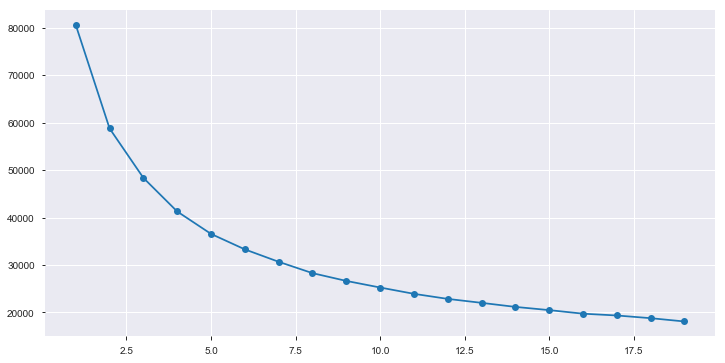

In [407]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Conclusion:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.